<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
columns_name = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv("pima-indians-diabetes.csv", names = columns_name)
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
df.shape

(768, 9)

# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

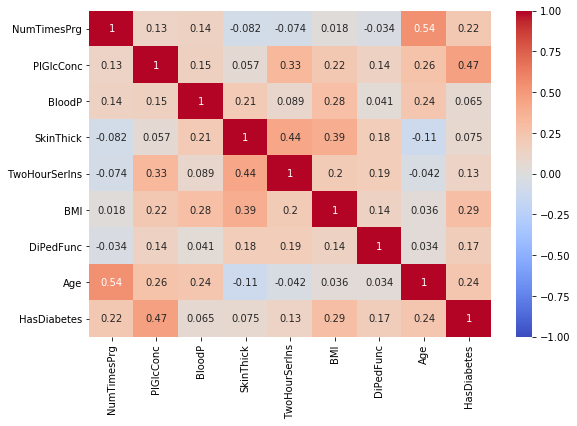

In [5]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [6]:
corr = {}
for i in range(0, len(df.columns)-1):
    a = df.iloc[:,i].corr(df['HasDiabetes'])
    corr[i] = a
b = sorted(corr.items(), key= lambda x: x[1], reverse = True)

In [7]:
df.iloc[:,b[0][0]]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

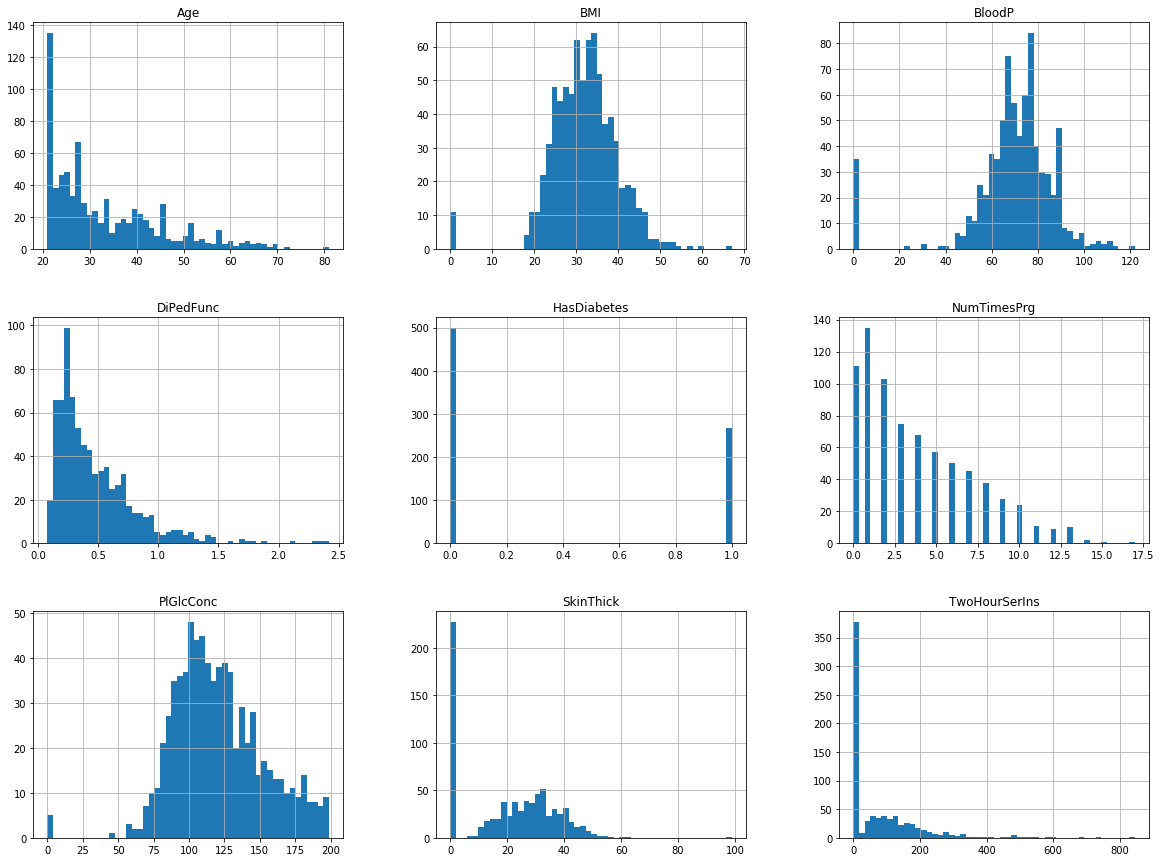

In [8]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
df1 = df.copy()

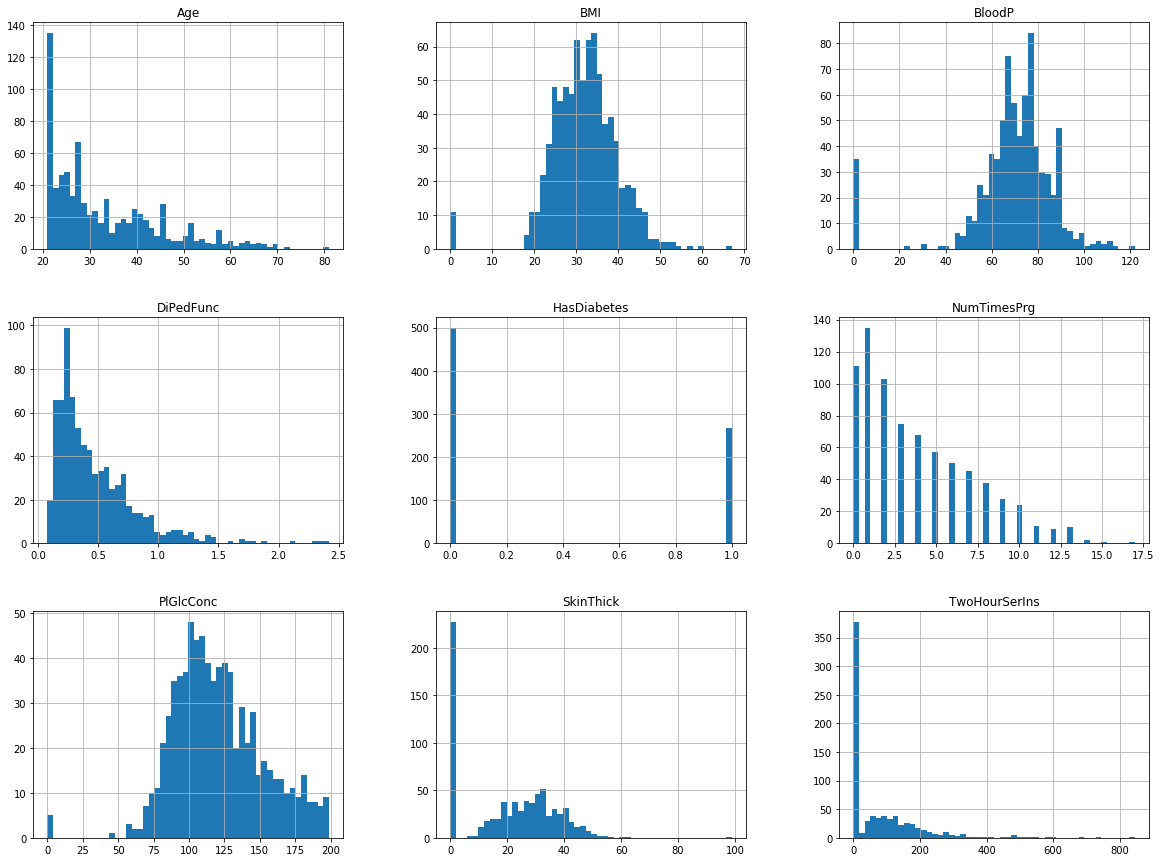

In [10]:
df1.hist(bins=50, figsize=(20, 15))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [11]:
df.isnull().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [12]:
df['SkinThick'][df['SkinThick'] < 10].count()

231

In [13]:
df1['SkinThick'][df1['SkinThick'] < 10].count()

231

In [14]:
df1['SkinThick'][df1['SkinThick'] < 10] = df1['SkinThick'].median()
df1['BMI'][df1['BMI'] < 10] = df1['SkinThick'].median()
df1['BloodP'][df1['BloodP'] < 10] = df1['BloodP'].median()
df1['TwoHourSerIns'][df1['TwoHourSerIns'] < 10] = df1['TwoHourSerIns'].median()
df1['PlGlcConc'][df1['PlGlcConc'] < 10] = df1['TwoHourSerIns'].median()


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [15]:
X = df1.drop('HasDiabetes', axis = 1).values
y = df1['HasDiabetes'].values
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 3.050e+01, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 3.050e+01, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 2.300e+01, 3.050e+01, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [16]:
#StandardScaler transform data into mean of 0 and standard deviation of 1.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.63994726,  0.8602134 , -0.03198993,  0.83199672, -0.60820096,
         0.18356822,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.15426163, -0.5283186 ,  0.17382661, -0.60820096,
        -0.82189559, -0.36506078, -0.19067191],
       [ 1.23388019,  1.97936619, -0.69376149, -0.4843435 , -0.60820096,
        -1.29589995,  0.60439732, -0.10558415],
       [-0.84488505, -1.02635846, -0.5283186 , -0.4843435 , -0.00618459,
        -0.60643906, -0.92076261, -1.04154944],
       [-1.14185152,  0.50847966, -2.67907616,  0.83199672,  0.69537779,
         1.54812624,  5.4849091 , -0.0204964 ]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =7)

In [18]:
df1.shape

(768, 9)

# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:
1. Normalization gets rid of a number of anomalies that can make analysis of the data more complicated.
2. Splitting for testing the accuracy of moldel.

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [19]:
df1['HasDiabetes'][df1['HasDiabetes'] == 1 ].count()/df1['HasDiabetes'].count()

0.3489583333333333

In [20]:
y_train[y_train == 1].size/y_train.size

0.34364820846905536

In [21]:
y_test[y_test ==1].size/y_test.size

0.37012987012987014

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [23]:
from sklearn.metrics import jaccard_similarity_score, f1_score

In [24]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 11, 17, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    }
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
result_kn = grid_kn.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    1.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.7s finished


In [27]:
result_kn.best_score_

0.7492109038737446

In [28]:
Knn_best = result_kn.best_estimator_
Knn_best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [29]:
result_kn.best_params_

{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:
 1. 'metric': 'euclidean': the "ordinary" straight-line distance between two points
 2. 'n_neighbors': 17: The number of surrounding neighbour.
 3. 'weights': 'uniform': each neighbor within the boundary carries the same weight 

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [30]:
fit_kn = KNeighborsClassifier(n_neighbors = 17).fit(X_train,y_train)
fit_kn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [31]:
yhat_test_kn = fit_kn.predict(X_test)
print(yhat_test_kn[0:5])
print(y_test[0:5])

[0 1 1 0 1]
[0 1 1 0 1]


In [32]:
yhat_train_kn = fit_kn.predict(X_train)
print(yhat_train_kn[0:5])
print(y_train[0:5])

[0 0 1 0 0]
[0 1 1 1 1]


In [35]:
f1_scores['train']['KNN']= f1_score(y_train, yhat_train_kn, average='weighted')
f1_scores['test']['KNN'] = f1_score(y_test, yhat_test_kn, average='weighted')
jaccard_scores['train']['KNN'] = jaccard_similarity_score(y_train, yhat_train_kn)
jaccard_scores['test']['KNN'] = jaccard_similarity_score(y_test, yhat_test_kn)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7935738947868595, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [36]:
from sklearn import tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10),'max_leaf_nodes': np.arange(3, 10)}
dt = DecisionTreeClassifier()
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

result_tree = grid_tree.fit(X_train, y_train)

In [38]:
result_tree.best_score_

0.7426229508196721

In [39]:
dt_best = result_tree.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
1. max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
2. max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [40]:
from sklearn.tree import DecisionTreeClassifier
fit_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5).fit(X_train, y_train)
fit_tree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
yhat_test_tree = fit_tree.predict(X_test)
print(yhat_test_tree[0:5])
print(y_test[0:5])

[0 1 0 0 1]
[0 1 1 0 1]


In [42]:
yhat_train_tree = fit_tree.predict(X_train)
print(yhat_train_tree[0:10])
print(y_train[0:10])

[1 0 1 0 1 0 0 0 0 0]
[0 1 1 1 1 0 1 0 0 0]


In [43]:
f1_scores['train']['DT']= f1_score(y_train, yhat_train_tree, average='weighted')
f1_scores['test']['DT'] = f1_score(y_test, yhat_test_tree, average='weighted')
jaccard_scores['train']['DT'] = jaccard_similarity_score(y_train, yhat_train_tree)
jaccard_scores['test']['DT'] = jaccard_similarity_score(y_test, yhat_test_tree)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0.8308077032329595, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7935738947868595, 'DT': 0.7609336562216144, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0.8306188925081434, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7597402597402597, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [45]:
from sklearn.svm import SVC

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svm = SVC(probability=True)
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75)}
grid_svm = GridSearchCV(svm, parameters)
result_svc = grid_svm.fit(X_train, y_train)

In [47]:
result_svc.best_score_

0.7703451952552313

In [48]:
svc_best = result_svc.best_estimator_
svc_best

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
1. C : Regularization parameter
2. Kernel is a feature transformation in an feature space. Linear Kernel is used when the data is Linearly separable

In [49]:
from sklearn import svm
fit_svm = svm.SVC(kernel='linear').fit(X_train,y_train)
fit_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
yhat_test_svm = fit_svm.predict(X_test)
print(yhat_test_svm[0:5])
print(y_test[0:5])

[0 1 1 0 0]
[0 1 1 0 1]


In [51]:
yhat_train_svm = fit_svm.predict(X_train)
print(yhat_train_svm[0:5])
print(y_train[0:5])

[0 0 1 0 0]
[0 1 1 1 1]


In [52]:
f1_scores['train']['SVM']=f1_score(y_train, yhat_train_svm, average='weighted')
f1_scores['test']['SVM'] = f1_score(y_test, yhat_test_svm, average='weighted')
jaccard_scores['train']['SVM'] = jaccard_similarity_score(y_train, yhat_train_svm)
jaccard_scores['test']['SVM'] = jaccard_similarity_score(y_test, yhat_test_svm)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0.8308077032329595, 'SVM': 0.7609508291827105, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7935738947868595, 'DT': 0.7609336562216144, 'SVM': 0.7542422200441069, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0.8306188925081434, 'SVM': 0.7703583061889251, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7597402597402597, 'SVM': 0.7662337662337663, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
grid_lr =GridSearchCV(logreg,grid,cv=10)
result_logreg = grid_lr. fit(X_train,y_train)
result_logreg.best_score_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Admin\anaconda3\lib\site-packages\

0.7719725013220518

In [56]:
lr_best = result_logreg.best_estimator_
lr_best

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
1. penalty: Used to specify the norm used in the penalization.
2. C: Inverse of regularization strength

In [57]:
fit_lr=LogisticRegression(C=1,penalty="l2").fit(X_train,y_train)

In [58]:
yhat_test_lr = fit_lr.predict(X_test)
print(yhat_test_lr[0:5])
print(y_test[0:5])

[0 1 1 0 0]
[0 1 1 0 1]


In [59]:
yhat_train_lr = fit_lr.predict(X_train)
print(yhat_train_lr[0:5])
print(y_train[0:5])

[0 0 1 0 0]
[0 1 1 1 1]


In [60]:
f1_scores['train']['LR']=f1_score(y_train, yhat_train_lr, average='weighted')
f1_scores['test']['LR'] = f1_score(y_test, yhat_test_lr, average='weighted')
jaccard_scores['train']['LR'] = jaccard_similarity_score(y_train, yhat_train_lr)
jaccard_scores['test']['LR'] = jaccard_similarity_score(y_test, yhat_test_lr)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0.8308077032329595, 'SVM': 0.7609508291827105, 'LR': 0.7643415975630976, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7935738947868595, 'DT': 0.7609336562216144, 'SVM': 0.7542422200441069, 'LR': 0.7636653617514862, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0.8306188925081434, 'SVM': 0.7703583061889251, 'LR': 0.7736156351791531, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7597402597402597, 'SVM': 0.7662337662337663, 'LR': 0.7727272727272727, 'EN_HARD': 0, 'EN_SOFT': 0}}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
estimators  = [('knn',Knn_best),('dt',dt_best),('svc',svc_best),('logreg',lr_best)]
ensemble_soft = VotingClassifier(estimators, voting = 'soft')
fit_en_soft = ensemble_soft.fit(X_train,y_train)

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [63]:
yhat_test_en_soft = fit_en_soft.predict(X_test)
print(yhat_test_en_soft[0:5])
print(y_test[0:5])

[0 1 1 0 0]
[0 1 1 0 1]


In [64]:
yhat_train_en_soft = fit_en_soft.predict(X_train)
print(yhat_train_en_soft[0:5])
print(y_train[0:5])

[0 0 1 0 0]
[0 1 1 1 1]


In [65]:
f1_scores['train']['EN_SOFT']= f1_score(y_train, yhat_train_en_soft, average='weighted')
f1_scores['test']['EN_SOFT'] = f1_score(y_test, yhat_test_en_soft, average='weighted')
jaccard_scores['train']['EN_SOFT'] = jaccard_similarity_score(y_train, yhat_train_en_soft)
jaccard_scores['test']['EN_SOFT'] = jaccard_similarity_score(y_test, yhat_test_en_soft)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0.8308077032329595, 'SVM': 0.7609508291827105, 'LR': 0.7643415975630976, 'EN_HARD': 0, 'EN_SOFT': 0.7770316296318854}, 'test': {'KNN': 0.7935738947868595, 'DT': 0.7609336562216144, 'SVM': 0.7542422200441069, 'LR': 0.7636653617514862, 'EN_HARD': 0, 'EN_SOFT': 0.7831610566304446}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0.8306188925081434, 'SVM': 0.7703583061889251, 'LR': 0.7736156351791531, 'EN_HARD': 0, 'EN_SOFT': 0.7866449511400652}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7597402597402597, 'SVM': 0.7662337662337663, 'LR': 0.7727272727272727, 'EN_HARD': 0, 'EN_SOFT': 0.7922077922077922}}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [67]:
estimators  = [('knn',Knn_best),('dt',dt_best),('svc',svc_best),('logreg',lr_best)]
ensemble = VotingClassifier(estimators, voting = 'hard')
fit_en = ensemble.fit(X_train,y_train)

In [68]:
yhat_test_en = fit_en.predict(X_test)
print(yhat_test_en[0:5])
print(y_test[0:5])

[0 1 1 0 0]
[0 1 1 0 1]


In [69]:
yhat_train_en = fit_en.predict(X_train)
print(yhat_train_en[0:5])
print(y_train[0:5])

[0 0 1 0 0]
[0 1 1 1 1]


In [70]:
f1_scores['train']['EN_HARD']= f1_score(y_train, yhat_train_en, average='weighted')
f1_scores['test']['EN_HARD'] = f1_score(y_test, yhat_test_en, average='weighted')
jaccard_scores['train']['EN_HARD'] = jaccard_similarity_score(y_train, yhat_train_en)
jaccard_scores['test']['EN_HARD'] = jaccard_similarity_score(y_test, yhat_test_en)
print('f1_scores: ','\n', f1_scores)
print('jaccard_scores: ','\n', jaccard_scores)

f1_scores:  
 {'train': {'KNN': 0.7725984609202861, 'DT': 0.8308077032329595, 'SVM': 0.7609508291827105, 'LR': 0.7643415975630976, 'EN_HARD': 0.7751828817481585, 'EN_SOFT': 0.7770316296318854}, 'test': {'KNN': 0.7935738947868595, 'DT': 0.7609336562216144, 'SVM': 0.7542422200441069, 'LR': 0.7636653617514862, 'EN_HARD': 0.7738430583501007, 'EN_SOFT': 0.7831610566304446}}
jaccard_scores:  
 {'train': {'KNN': 0.7817589576547231, 'DT': 0.8306188925081434, 'SVM': 0.7703583061889251, 'LR': 0.7736156351791531, 'EN_HARD': 0.7866449511400652, 'EN_SOFT': 0.7866449511400652}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7597402597402597, 'SVM': 0.7662337662337663, 'LR': 0.7727272727272727, 'EN_HARD': 0.7857142857142857, 'EN_SOFT': 0.7922077922077922}}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [71]:
data = {'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression','Hard Voting','Soft Voting'],
        'Jaccard-training':[jaccard_scores['train']['KNN'], jaccard_scores['train']['DT'], jaccard_scores['train']['SVM'],jaccard_scores['train']['LR'],jaccard_scores['train']['EN_HARD'],jaccard_scores['train']['EN_SOFT']],
        'F1-score-training':[f1_scores['train']['KNN'], f1_scores['train']['DT'], f1_scores['train']['SVM'],f1_scores['train']['LR'],f1_scores['train']['EN_HARD'],f1_scores['train']['EN_SOFT']],
       'Jaccard-testing':[jaccard_scores['test']['KNN'], jaccard_scores['test']['DT'], jaccard_scores['test']['SVM'],jaccard_scores['test']['LR'],jaccard_scores['test']['EN_HARD'],jaccard_scores['test']['EN_SOFT']],
       'F1-score-testing':[f1_scores['test']['KNN'], f1_scores['test']['DT'], f1_scores['test']['SVM'],f1_scores['test']['LR'],f1_scores['test']['EN_HARD'],f1_scores['test']['EN_SOFT']]}

In [72]:
table = pd.DataFrame(data)
table

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.781759,0.772598,0.805195,0.793574
1,Decision Tree,0.830619,0.830808,0.759740,0.760934
2,SVM,0.770358,0.760951,0.766234,0.754242
3,Logistic Regression,0.773616,0.764342,0.772727,0.763665
4,Hard Voting,0.786645,0.775183,0.785714,0.773843
5,Soft Voting,0.786645,0.777032,0.792208,0.783161


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
No, when a single model that is closest to the true data generating process will always be best and will beat most ensemble methods. In this case, Decistion Tree model return better score.